In [491]:
import numpy as np # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import warnings
warnings.filterwarnings('ignore')

# load data


In [492]:
# load dataset
df = pd.read_csv("D:\Data Science\Project\loan_data.csv")


# Basic Info

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# statistical summary

In [494]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

# Data head and tail

In [495]:
df.head(10)

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   
5        21.0        female      High School        12951.0               0   
6        26.0        female         Bachelor        93471.0               1   
7        24.0        female      High School        95550.0               5   
8        24.0        female        Associate       100684.0               3   
9        21.0        female      High School        12739.0               0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   
5                   OWN     2500.0     VENTURE           7.14   
6                  RENT    35000.0   EDUCATION          12.42   
7                  RENT    35000.0     MEDICAL          11.11   
8                  RENT    35000.0    PERSONAL           8.90   
9                   OWN     1600.0     VENTURE          14.74   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   
5                 0.19                         2.0           532   
6                 0.37                         3.0           701   
7                 0.37                         4.0           585   
8                 0.35                         2.0           544   
9                 0.13                         3.0           640   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1  
5                             No            1  
6                             No            1  
7                             No            1  
8                             No            1  
9                             No            1

In [496]:
df.tail(10)

person_age person_gender person_education  person_income  \
44990        31.0          male           Master       136832.0   
44991        24.0          male      High School        37786.0   
44992        23.0        female         Bachelor        40925.0   
44993        27.0        female      High School        35512.0   
44994        24.0        female        Associate        31924.0   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
44990               9                  RENT    12319.0           PERSONAL   
44991               0              MORTGAGE    13500.0          EDUCATION   
44992               0                  RENT     9000.0           PERSONAL   
44993               4                  RENT     5000.0           PERSONAL   
44994               2                  RENT    12229.0            MEDICAL   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
44990          16.92                 0.09                         7.0   
44991          13.43                 0.36                         4.0   
44992          11.01                 0.22                         4.0   
44993          15.83                 0.14                         5.0   
44994          10.70                 0.38                         4.0   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
44990           722                             No            1  
44991           612                             No            1  
44992           487                             No            1  
44993           505                             No            1  
44994           678                             No            1  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1

# Data shape

In [497]:
# shape of data
df.shape 
print ('Number of rows:', df.shape[0])
print ('Number of columns:', df.shape[1])
df.shape

Number of rows: 45000
Number of columns: 14


(45000, 14)

# Numerical and catagorical data

In [498]:
num_df = df.select_dtypes(include=['int64', 'float64'])
print(num_df)

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [499]:
num_col = num_df.columns # numerical columns
print(num_col)

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


In [500]:
cat_df= df.select_dtypes(include=['object'])
print(cat_df)

      person_gender person_education person_home_ownership        loan_intent  \
0            female           Master                  RENT           PERSONAL   
1            female      High School                   OWN          EDUCATION   
2            female      High School              MORTGAGE            MEDICAL   
3            female         Bachelor                  RENT            MEDICAL   
4              male           Master                  RENT            MEDICAL   
...             ...              ...                   ...                ...   
44995          male        Associate                  RENT            MEDICAL   
44996        female        Associate                  RENT    HOMEIMPROVEMENT   
44997          male        Associate                  RENT  DEBTCONSOLIDATION   
44998          male         Bachelor                  RENT          EDUCATION   
44999          male      High School                  RENT  DEBTCONSOLIDATION   

      previous_loan_default

In [501]:
cat_col= cat_df.columns
print(cat_col)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


# Missing Values

Check for missing values

If there were missing values, we could handle them as follows:
- For numerical columns: Fill with mean/median
   df['column_name'].fillna(df['column_name'].median(), inplace=True)

- For categorical columns: Fill with mode (most frequent value)
   df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

- Alternatively, drop rows with missing values (only if needed)
   df.dropna(inplace=True)

 Since there are no missing values in our dataset, we don't need to handle them.


In [502]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Duplicates

In [503]:
df.duplicated().sum()

0

# Columns

In [504]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

# Unique values in catagorical df

In [505]:
for col in cat_df:
    print(f"\nUnique values in {col}:") #\n → Inserts a newline (moves text to a new line).f"" (f-string) → Allows embedding variables inside curly braces {}
    print(df[col].value_counts())


Unique values in person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64

Unique values in person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Unique values in person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Unique values in loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

Unique values in previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


# Univariate analysis

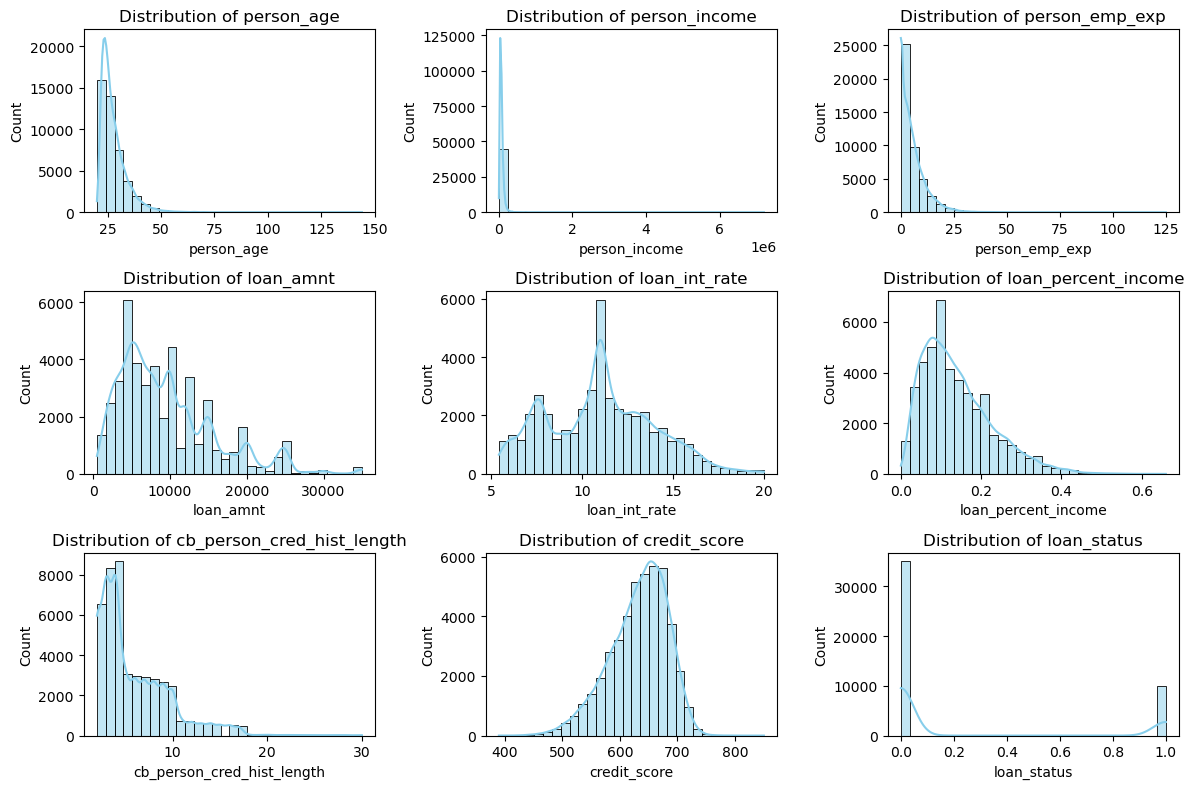

In [506]:
# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

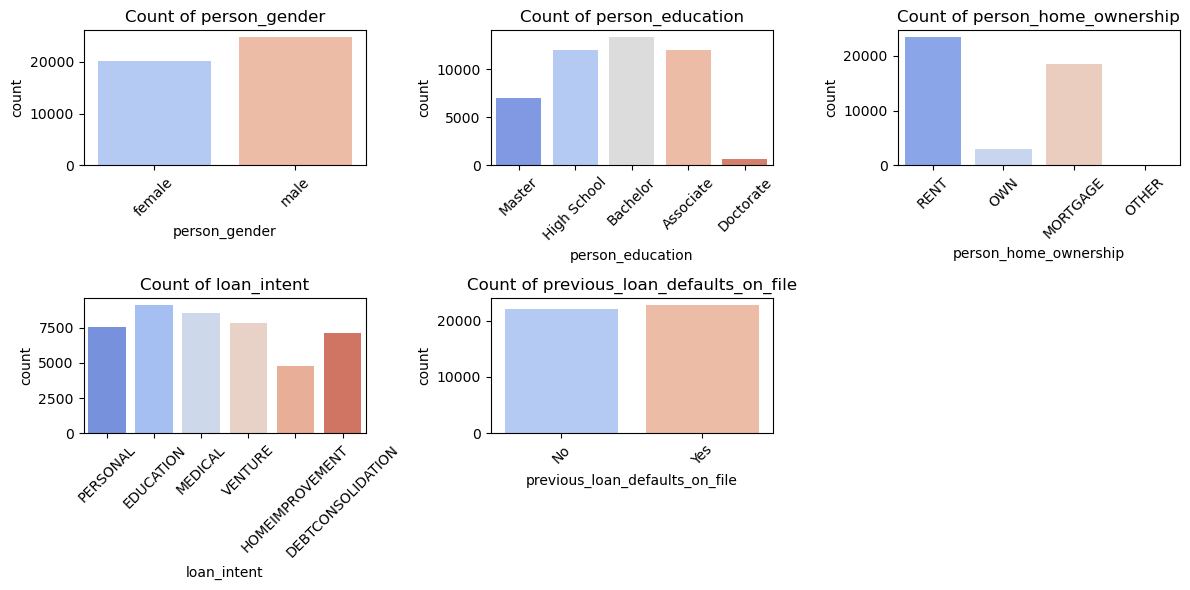

In [507]:
# categorical cols plot

plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_df, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


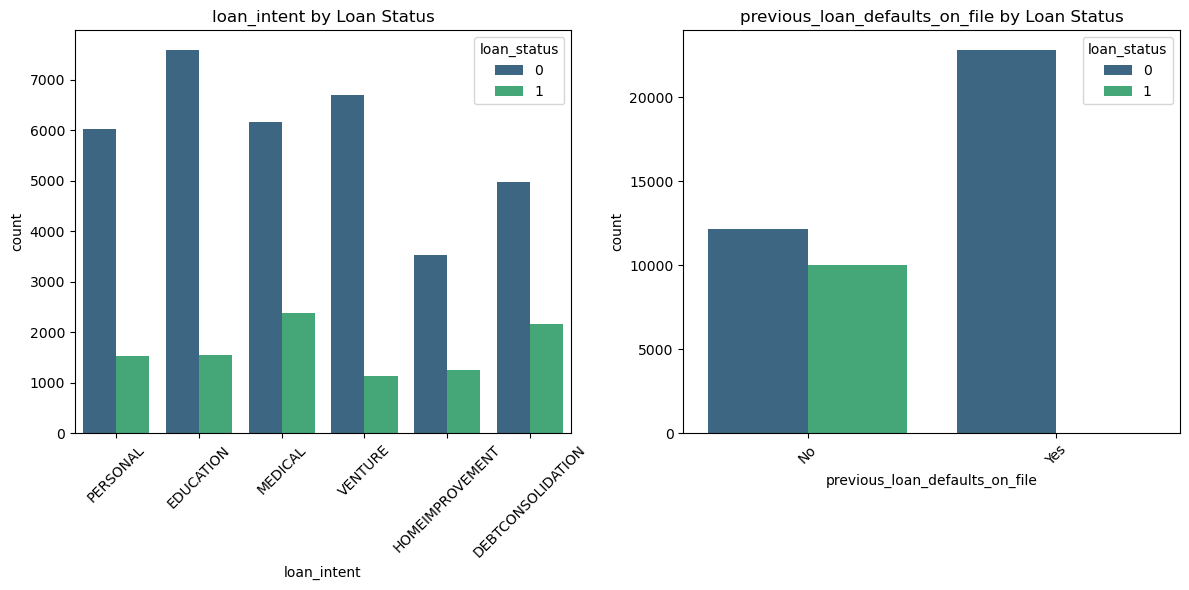

In [508]:
#Correct list of categorical columns
cat_df = ['loan_intent', 'previous_loan_defaults_on_file']

# Create a 1x2 subplot grid (adjust this if your list size changes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot each categorical column
for i, column in enumerate(cat_df):
    sns.countplot(data=df, x=column, ax=axes[i], palette='viridis', hue='loan_status')
    axes[i].set_title(f'{column} by Loan Status')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Bivariate analysis

In [509]:
cat_col

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [510]:
num_col

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

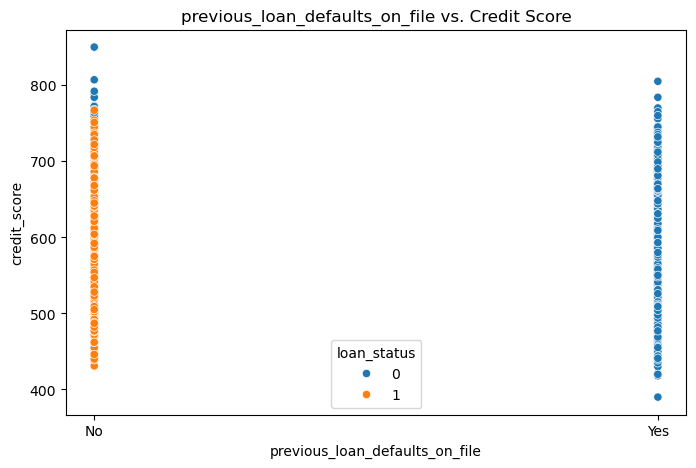

In [511]:
# Categorical vs Numerical
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["previous_loan_defaults_on_file"], y=df["credit_score"], hue=df["loan_status"])
plt.title("previous_loan_defaults_on_file vs. Credit Score")
plt.show()


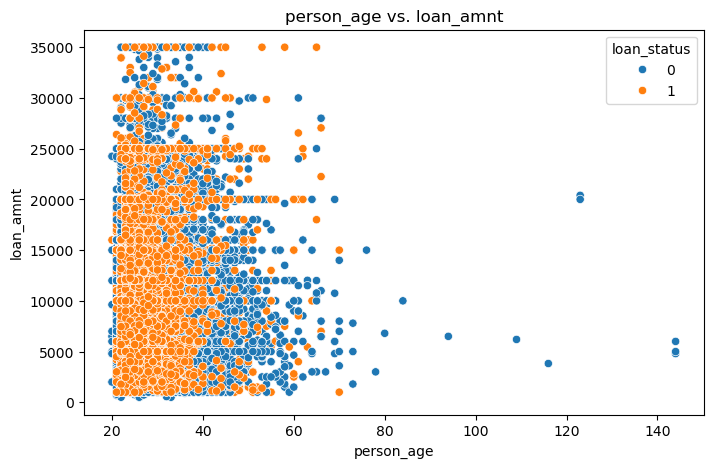

In [512]:
# Numerical vs Numerical
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["person_age"], y=df["loan_amnt"], hue=df["loan_status"])
plt.title("person_age vs. loan_amnt")
plt.show()

# Multivariate anlysis

In [513]:
corr_matrix = num_df.corr()
corr_matrix

person_age  person_income  person_emp_exp  \
person_age                    1.000000       0.193698        0.954412   
person_income                 0.193698       1.000000        0.185987   
person_emp_exp                0.954412       0.185987        1.000000   
loan_amnt                     0.050750       0.242290        0.044589   
loan_int_rate                 0.013402       0.001510        0.016631   
loan_percent_income          -0.043299      -0.234177       -0.039862   
cb_person_cred_hist_length    0.861985       0.124316        0.824272   
credit_score                  0.178432       0.035919        0.186196   
loan_status                  -0.021476      -0.135808       -0.020481   

                            loan_amnt  loan_int_rate  loan_percent_income  \
person_age                   0.050750       0.013402            -0.043299   
person_income                0.242290       0.001510            -0.234177   
person_emp_exp               0.044589       0.016631            -0.039862   
loan_amnt                    1.000000       0.146093             0.593011   
loan_int_rate                0.146093       1.000000             0.125209   
loan_percent_income          0.593011       0.125209             1.000000   
cb_person_cred_hist_length   0.042969       0.018008            -0.031868   
credit_score                 0.009074       0.011498            -0.011483   
loan_status                  0.107714       0.332005             0.384880   

                            cb_person_cred_hist_length  credit_score  \
person_age                                    0.861985      0.178432   
person_income                                 0.124316      0.035919   
person_emp_exp                                0.824272      0.186196   
loan_amnt                                     0.042969      0.009074   
loan_int_rate                                 0.018008      0.011498   
loan_percent_income                          -0.031868     -0.011483   
cb_person_cred_hist_length                    1.000000      0.155204   
credit_score                                  0.155204      1.000000   
loan_status                                  -0.014851     -0.007647   

                            loan_status  
person_age                    -0.021476  
person_income                 -0.135808  
person_emp_exp                -0.020481  
loan_amnt                      0.107714  
loan_int_rate                  0.332005  
loan_percent_income            0.384880  
cb_person_cred_hist_length    -0.014851  
credit_score                  -0.007647  
loan_status                    1.000000

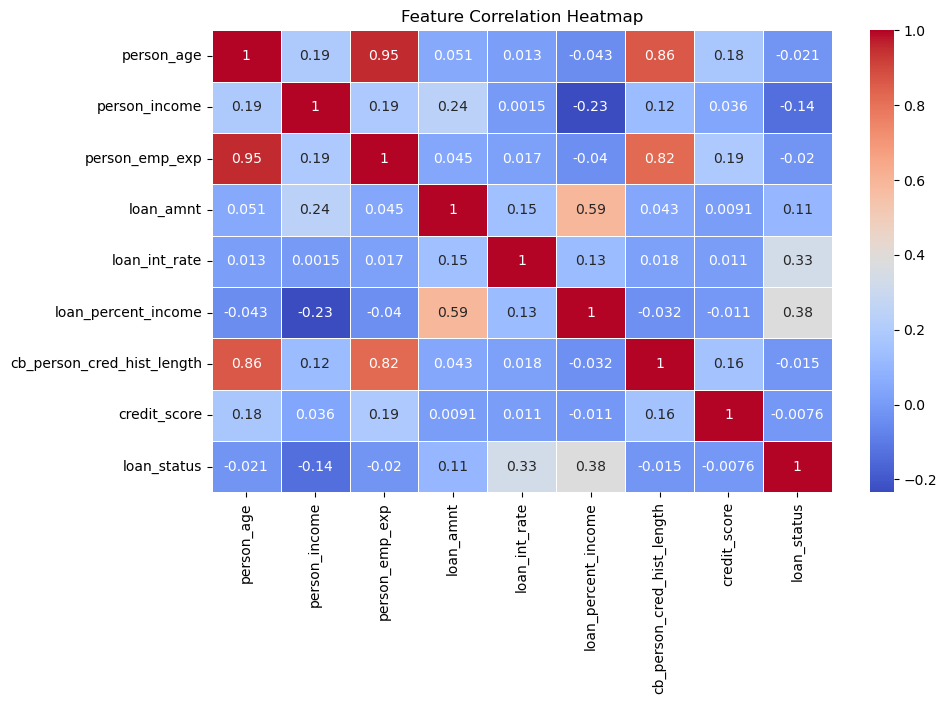

In [514]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Text(0.5, 36.72222222222221, 'Loan Status')

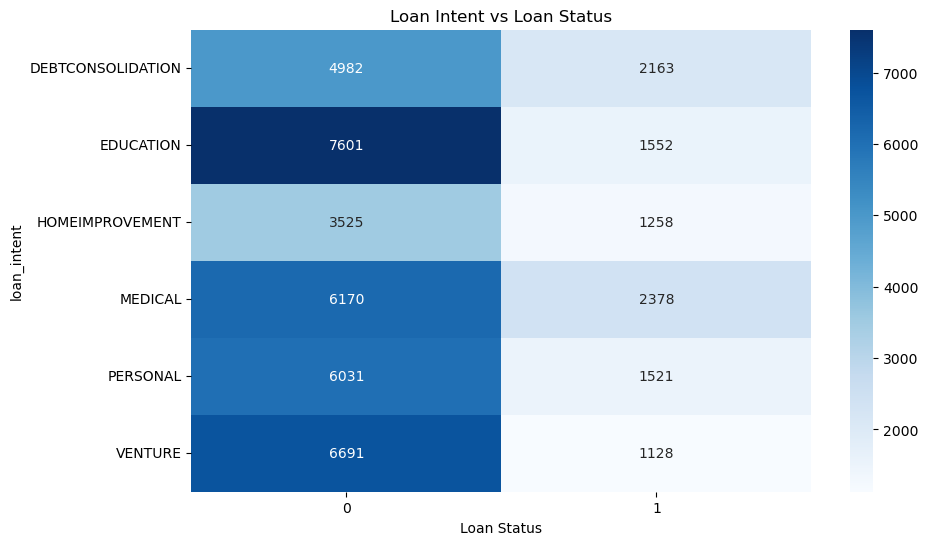

In [515]:
# Heatmap for catagorical varibles
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['loan_intent'], df['loan_status']), annot=True, fmt='d', cmap='Blues')
plt.title('Loan Intent vs Loan Status')
plt.xlabel('Loan Status')



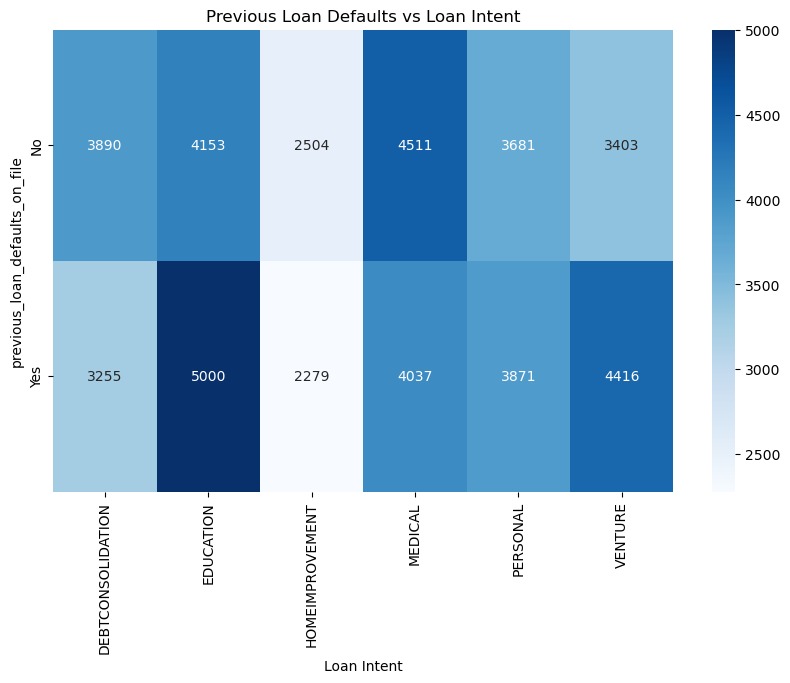

In [516]:
# Heatmap for catagorical varibles
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_intent']), annot=True, fmt='d', cmap='Blues')
plt.title('Previous Loan Defaults vs Loan Intent')
plt.xlabel('Loan Intent')
plt.show()

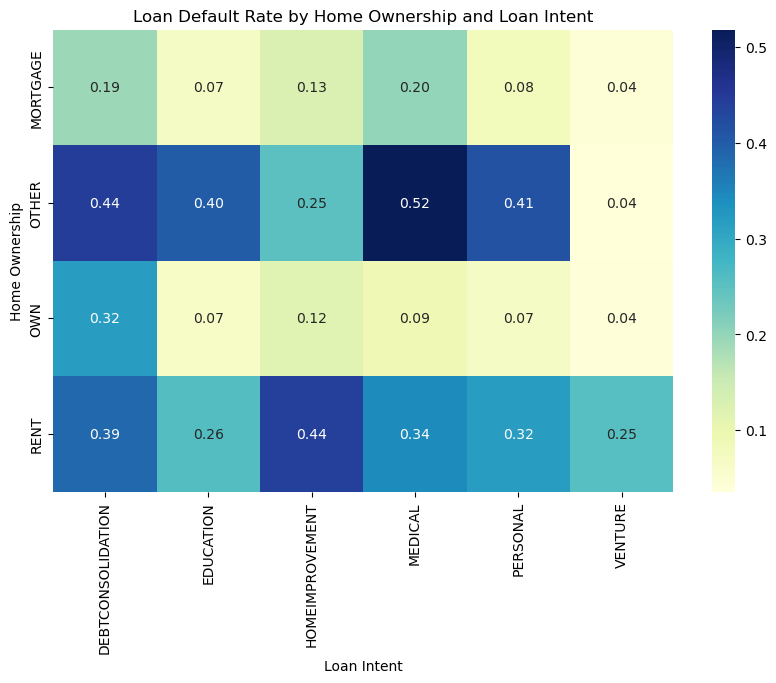

In [517]:
# pivot table (heatmap of loan default rate)
pivot_table = df.groupby(['person_home_ownership', 'loan_intent', 'person_gender'])['loan_status'].mean().reset_index()

# Pivot it to create a matrix format
heatmap_data = pivot_table.pivot_table(
    index='person_home_ownership',
    columns='loan_intent',
    values='loan_status',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Loan Default Rate by Home Ownership and Loan Intent')
plt.ylabel('Home Ownership')
plt.xlabel('Loan Intent')
plt.show()

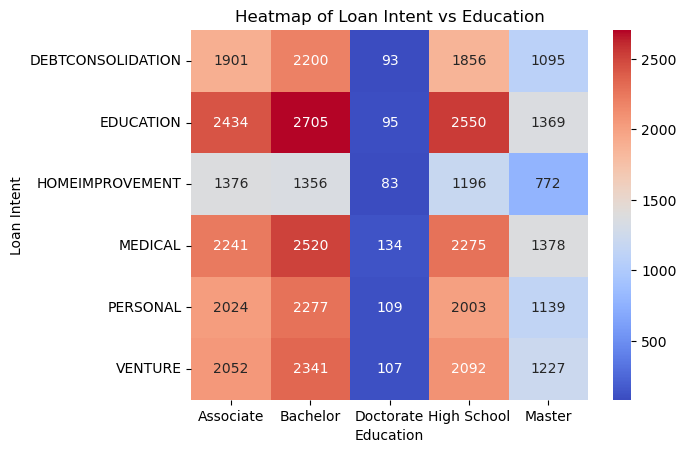

In [518]:
# Heatmap for catagorical varibles

cross_tab = pd.crosstab(df['loan_intent'], df['person_education'])

sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Loan Intent vs Education')
plt.ylabel('Loan Intent')
plt.xlabel('Education')
plt.show()

# Outlier detection and Handling

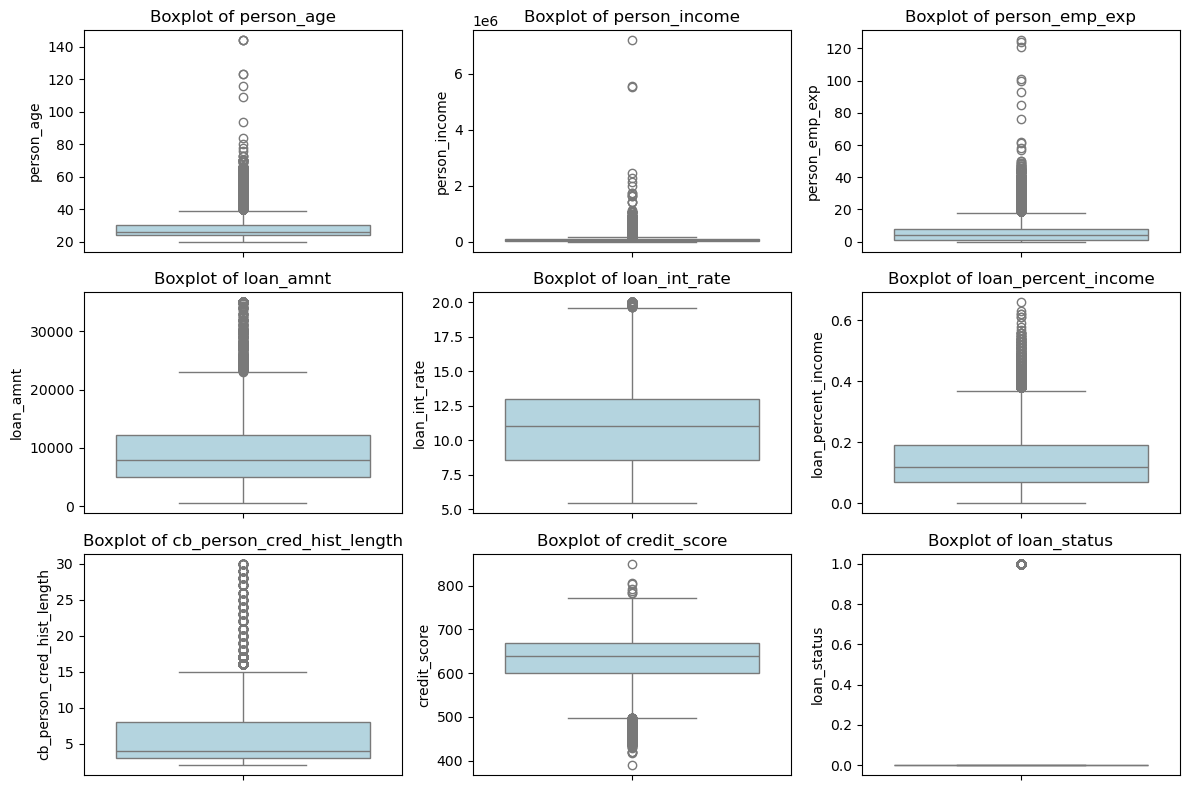

In [519]:
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_df, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [520]:
num_col = [col for col in num_col if col != 'loan_status']

# Loop over each numerical column and apply IQR method
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Final shape after removing all outliers
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (36065, 14)


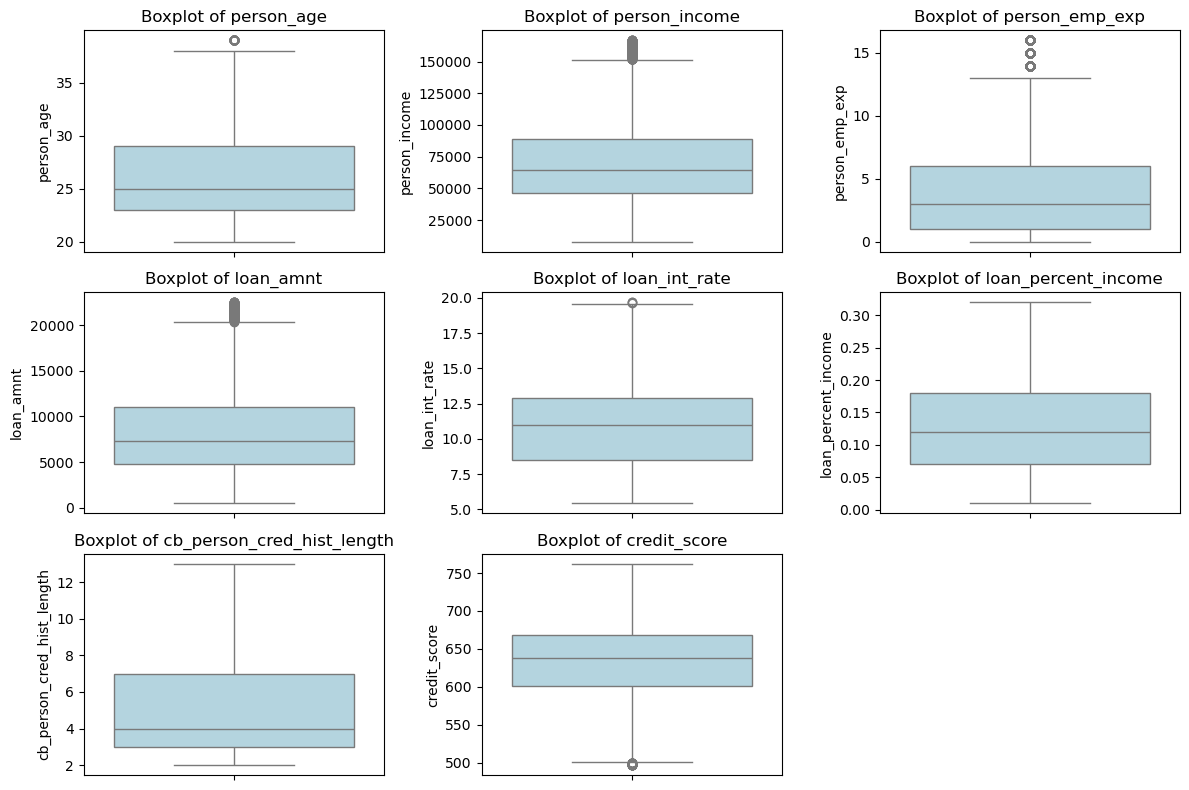

In [521]:
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [522]:
print("Minimum values: \n", df[num_col].min())
print("\nMaximum values: \n", df[num_col].max())

Minimum values: 
 person_age                      20.00
person_income                 8000.00
person_emp_exp                   0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_percent_income              0.01
cb_person_cred_hist_length       2.00
credit_score                   497.00
dtype: float64

Maximum values: 
 person_age                        39.00
person_income                 166754.00
person_emp_exp                    16.00
loan_amnt                      22500.00
loan_int_rate                     19.69
loan_percent_income                0.32
cb_person_cred_hist_length        13.00
credit_score                     762.00
dtype: float64


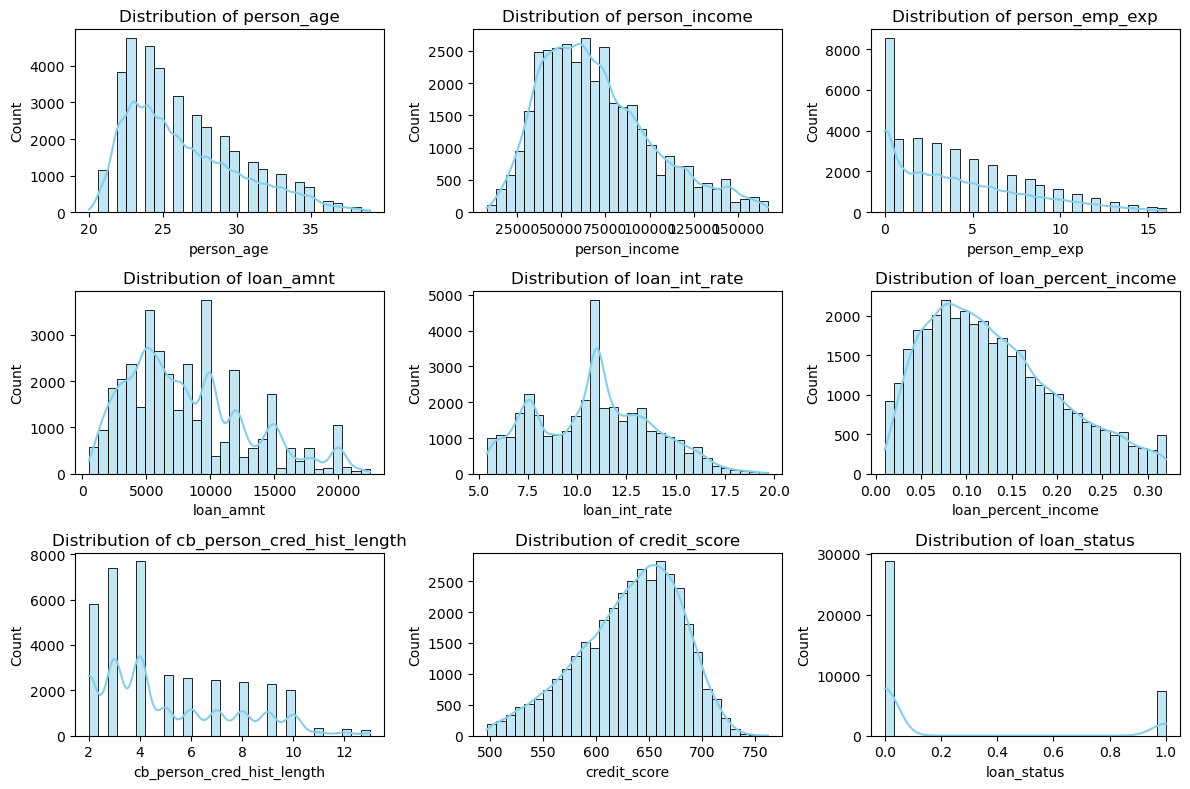

In [523]:
# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

# Further steps
1. encoding 
2. model training for prediction
3. web hosting and deployment using HTML, CSS & FLASK API  

# Feature Engineering

In [524]:
cat_col2= df.select_dtypes(include=['object']).columns.tolist()
cat_col2

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [525]:
for col in cat_col2:
    print(f'Disrtribution in {col} is: ')
    print(df[col].value_counts())

Disrtribution in person_gender is: 
person_gender
male      19742
female    16323
Name: count, dtype: int64
Disrtribution in person_education is: 
person_education
Bachelor       11176
Associate       9408
High School     9313
Master          5795
Doctorate        373
Name: count, dtype: int64
Disrtribution in person_home_ownership is: 
person_home_ownership
RENT        19538
MORTGAGE    14138
OWN          2302
OTHER          87
Name: count, dtype: int64
Disrtribution in loan_intent is: 
loan_intent
EDUCATION            7549
MEDICAL              6999
VENTURE              6231
PERSONAL             5948
DEBTCONSOLIDATION    5688
HOMEIMPROVEMENT      3650
Name: count, dtype: int64
Disrtribution in previous_loan_defaults_on_file is: 
previous_loan_defaults_on_file
Yes    18882
No     17183
Name: count, dtype: int64


# Slpit data to Train and Test

In [526]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1) # features
y = df['loan_status'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train and 20% test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# check the distribution of target variable in train and test data
print(f'distribution of target variable in train and test data:', y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))


(28852, 13) (7213, 13) (28852,) (7213,)
distribution of target variable in train and test data: loan_status
0    0.797969
1    0.202031
Name: proportion, dtype: float64 loan_status
0    0.797588
1    0.202412
Name: proportion, dtype: float64


# One hot encoding

In [527]:
# One-Hot Encode Categorical Features
X_train = pd.get_dummies(X_train, columns=cat_col2, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_col2, drop_first=True)
# Align the train and test dataframes to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
# check the shape of train and test data after one-hot encoding
print(f'shape of train and test data after one-hot encoding:', X_train.shape, X_test.shape)
# check the first few rows of train and test data after one-hot encoding
print(f'HEAD', X_train.head(), X_test.head())


shape of train and test data after one-hot encoding: (28852, 22) (7213, 22)
HEAD        person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
4371         22.0        29754.0               0     4800.0           7.49   
36914        32.0        31810.0               9     3000.0           9.70   
23601        32.0        44939.0               7     9000.0           6.92   
9547         24.0        75777.0               0     9500.0           6.54   
43972        30.0        59500.0               9    10000.0          15.45   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
4371                  0.16                         2.0           598   
36914                 0.09                         9.0           599   
23601                 0.20                         8.0           670   
9547                  0.13                         2.0           670   
43972                 0.17                         8.0           610   

       person_gen

# Scaling

In [528]:
# Encoding numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply StandardScaler to the numerical columns in the training set
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])  # Use transform on test set to avoid data leakage
X_train.head(10)
X_test.head(10)

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
8179    -0.365686       0.173097       -0.278623  -0.184092      -1.329854   
34904   -0.624792      -1.049544       -0.794480  -1.106036      -1.603234   
44109    1.966265      -1.380238        1.526873  -0.058372       0.047295   
21369    0.670736      -0.881909        1.268945  -0.561251       0.891355   
34021    1.188948      -1.015890        0.753089  -0.686970       0.081468   
22270    1.448053      -0.145013        1.526873  -1.106036       0.043878   
28213    0.929842       2.161011        1.526873   1.282638       1.250165   
19024    0.929842      -0.221505        1.011017  -1.315569      -0.304681   
2304    -0.365686      -1.002256       -0.794480  -0.739354       0.043878   
44428   -0.624792      -0.130744        0.237233  -0.267905       1.704659   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
8179             -0.417407                   -1.132819     -1.579316   
34904            -0.696581                   -0.377318      1.024144   
44109             2.374336                    0.755933     -1.810268   
21369             0.001355                    0.755933      0.730205   
34021             0.001355                    1.511434      1.675008   
22270            -1.115343                    0.755933      1.087131   
28213            -0.417407                    1.889184      1.633017   
19024            -1.394517                    0.000432     -1.201394   
2304             -0.138232                   -1.132819      0.709209   
44428            -0.277820                   -0.755069     -1.327368   

       person_gender_male  person_education_Bachelor  ...  \
8179                 True                       True  ...   
34904               False                       True  ...   
44109               False                      False  ...   
21369               False                      False  ...   
34021               False                      False  ...   
22270               False                      False  ...   
28213                True                       True  ...   
19024                True                      False  ...   
2304                 True                      False  ...   
44428                True                       True  ...   

       person_education_Master  person_home_ownership_OTHER  \
8179                     False                        False   
34904                    False                        False   
44109                    False                        False   
21369                    False                        False   
34021                     True                        False   
22270                     True                        False   
28213                    False                        False   
19024                    False                        False   
2304                     False                        False   
44428                    False                        False   

       person_home_ownership_OWN  person_home_ownership_RENT  \
8179                       False                        True   
34904                      False                        True   
44109                      False                        True   
21369                      False                        True   
34021                      False                        True   
22270                      False                       False   
28213                      False                       False   
19024                      False                        True   
2304                       False                       False   
44428                      False                        True   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
8179                   False                        False   
34904                  False                        False   
44109                  False                        False   
21369                   True            

Class imbalance in target variable: loan_status
0    0.797969
1    0.202031
Name: proportion, dtype: float64


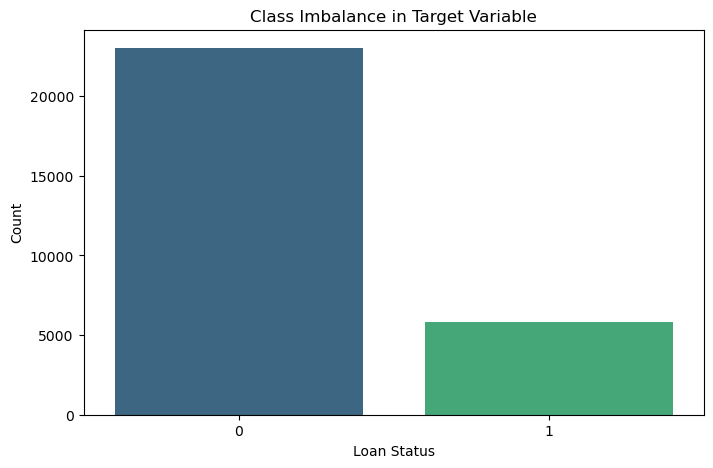

In [529]:
# Checking class imbalance of data
print(f'Class imbalance in target variable:', y_train.value_counts(normalize=True))
# Plotting class imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Imbalance in Target Variable')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Balancing Dataset


In [530]:
# Balancing Dataset
from imblearn.combine import SMOTETomek
# Balance
smt = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

# Check the distribution of the target variable after balancing
print(f'distribution of the target variable after balancing: ', y_train_balanced.value_counts(normalize=True))
# Check the shape of the balanced dataset
print(f'shape of the balanced dataset:', X_train_balanced.shape, y_train_balanced.shape)

# Check the shape of the test dataset
print(f'shape of the test dataset:', X_test.shape, y_test.shape)

print("Class distribution in balanced training set:", y_train_balanced.value_counts())





distribution of the target variable after balancing:  loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64
shape of the balanced dataset: (45966, 22) (45966,)
shape of the test dataset: (7213, 22) (7213,)
Class distribution in balanced training set: loan_status
0    22983
1    22983
Name: count, dtype: int64


Class imbalance in target variable after balancing: loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64


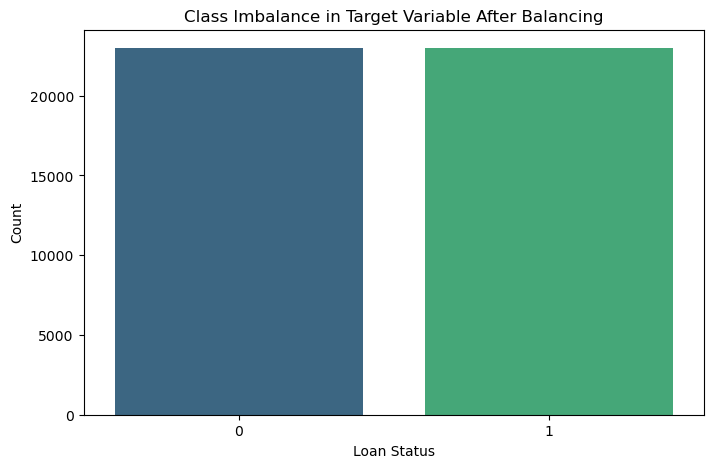

In [531]:
# check class imbalance of target varible after balancing

print(f'Class imbalance in target variable after balancing:', y_train_balanced.value_counts(normalize=True))
# Plotting class imbalance after balancing
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_balanced, palette='viridis')
plt.title('Class Imbalance in Target Variable After Balancing')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Model training


# Logistic regression

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5753
           1       0.59      0.91      0.72      1460

    accuracy                           0.85      7213
   macro avg       0.78      0.88      0.81      7213
weighted avg       0.90      0.85      0.86      7213

[[4832  921]
 [ 128 1332]]
Accuracy: 0.8545681408567863
ROC AUC Score: 0.8761191897497196


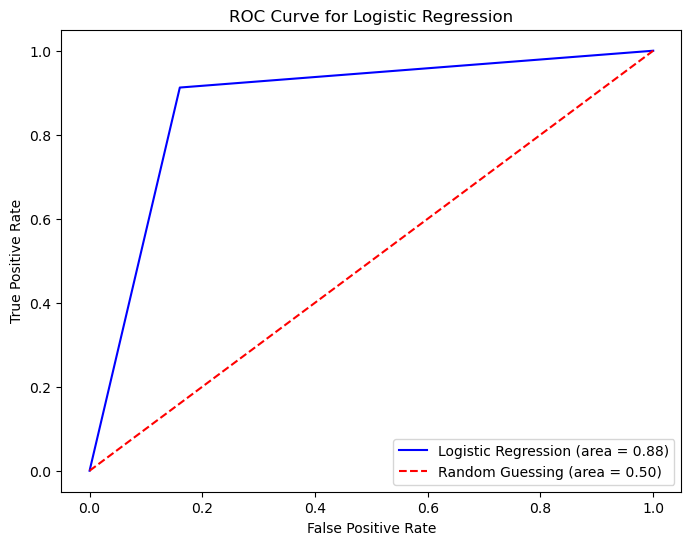

In [532]:
# Logistcitic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
# Fit the model on the balanced training data
log_reg.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_log_reg))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_log_reg))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_log_reg)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes Model

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      5753
           1       0.44      0.98      0.61      1460

    accuracy                           0.74      7213
   macro avg       0.72      0.83      0.71      7213
weighted avg       0.88      0.74      0.77      7213

[[3905 1848]
 [  23 1437]]
Accuracy: 0.7406072369333149
ROC AUC Score: 0.8315114329867205


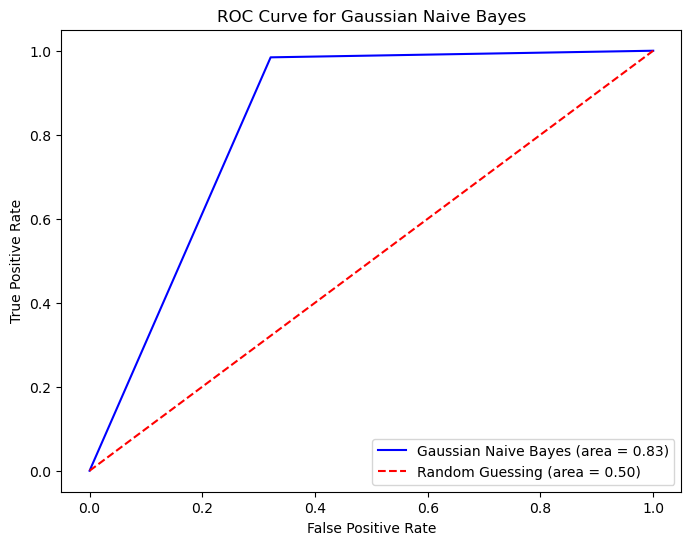

In [533]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()
# Fit the model on the balanced training data
gnb.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_gnb))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_gnb))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gnb))
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_gnb)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Tree Model

# Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5753
           1       0.67      0.78      0.72      1460

    accuracy                           0.88      7213
   macro avg       0.81      0.84      0.82      7213
weighted avg       0.89      0.88      0.88      7213

[[5191  562]
 [ 320 1140]]
Accuracy: 0.8777207819215306
ROC AUC Score: 0.8415668775552482


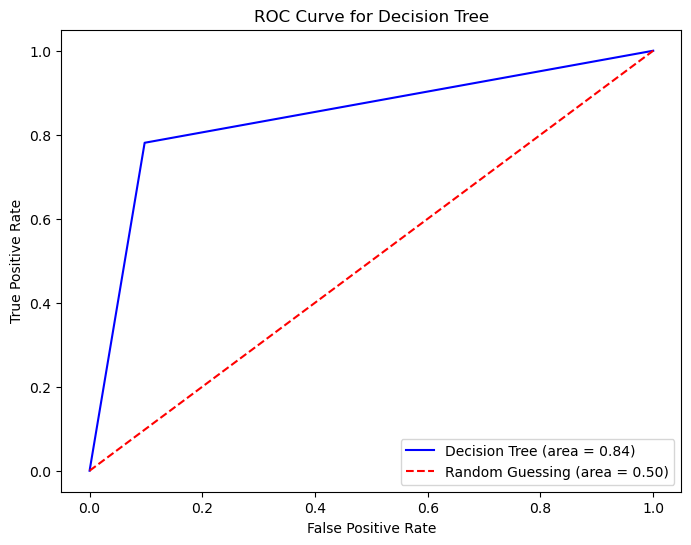

In [534]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
# Fit the model on the balanced training data
dt.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred_dt = dt.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_dt))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_dt))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_dt)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


# Random Forest

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5753
           1       0.77      0.82      0.79      1460

    accuracy                           0.91      7213
   macro avg       0.86      0.88      0.87      7213
weighted avg       0.92      0.91      0.91      7213

[[5403  350]
 [ 270 1190]]
Accuracy: 0.9140440870650215
ROC AUC Score: 0.8771153347032756


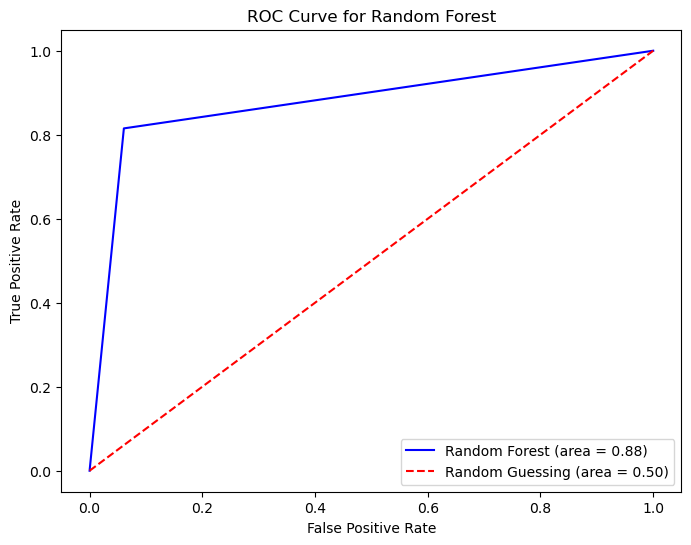

In [535]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
# Fit the model on the balanced training data
rf.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_rf))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_rf)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

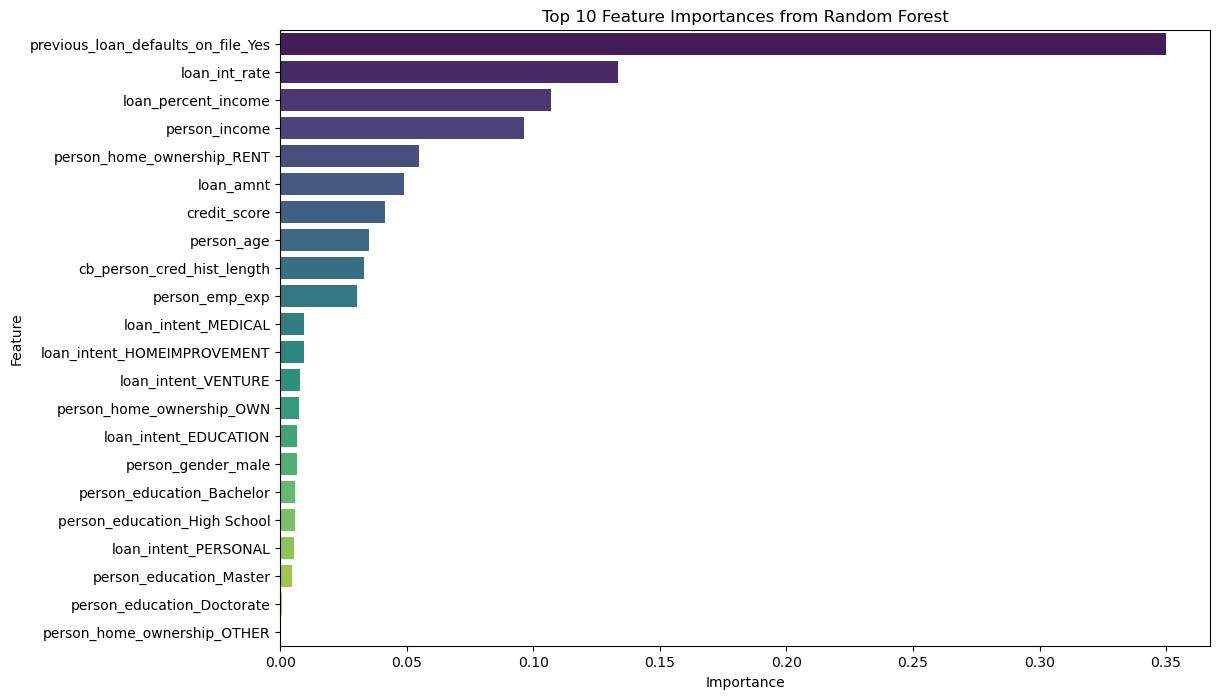

In [536]:
# Extract feature importances from the RandomForestClassifier
importances = rf.feature_importances_
# Get the feature names
feature_names = X_train.columns
# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# XGBoost

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5753
           1       0.83      0.80      0.82      1460

    accuracy                           0.93      7213
   macro avg       0.89      0.88      0.88      7213
weighted avg       0.93      0.93      0.93      7213

[[5510  243]
 [ 288 1172]]
Accuracy: 0.9263829197282684
ROC AUC Score: 0.8802504470568066


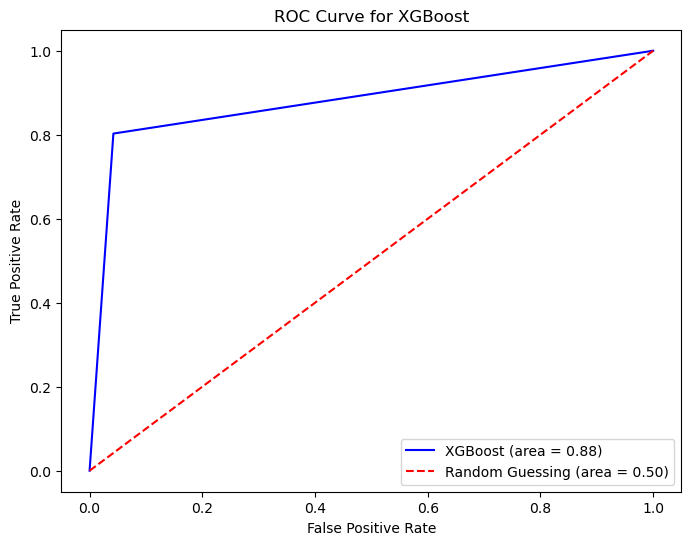

In [537]:
# XGBoost
from xgboost import XGBClassifier # type: ignore
# Create an XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# Fit the model on the balanced training data
xgb.fit(X_train_balanced, y_train_balanced)
# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_xgb))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_xgb))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_xgb)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

# feature importances from the XGBoost

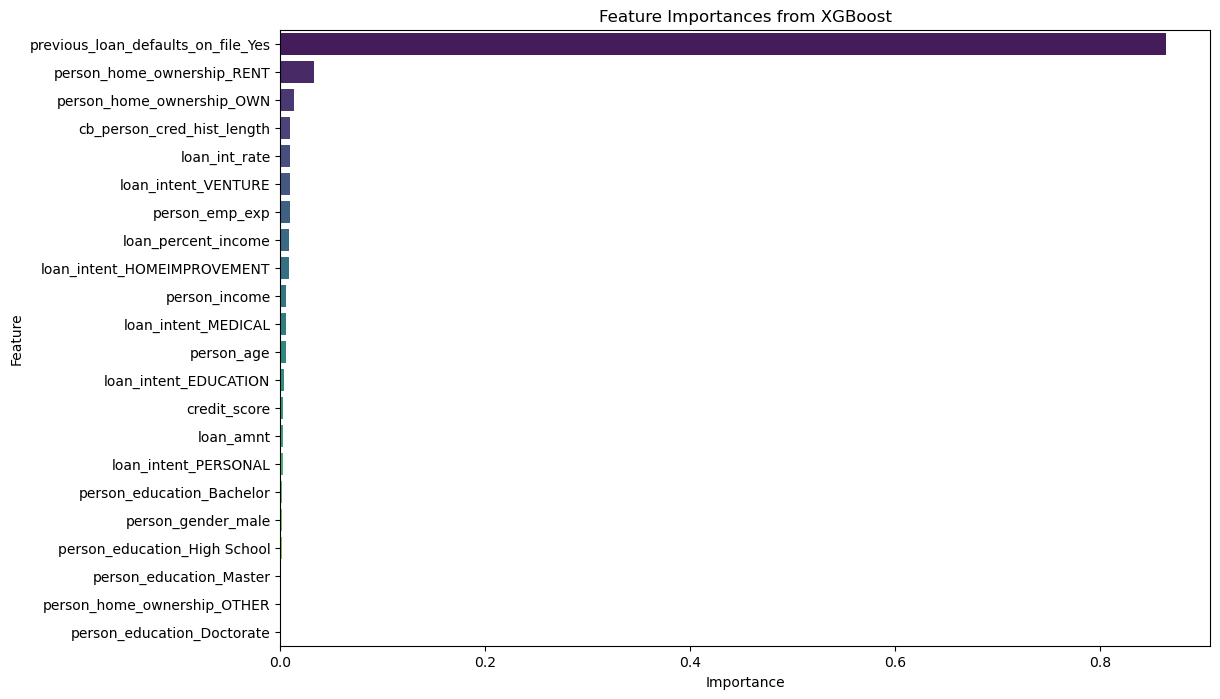

In [538]:
# Extract feature importances from the XGBoost model
importances_xgb = xgb.feature_importances_
# Create a DataFrame for better visualization
importances_xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb})
# Sort the DataFrame by importance
importances_xgb_df = importances_xgb_df.sort_values(by='Importance', ascending=False)
# Plot feature importances from XGBoost
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_xgb_df, palette='viridis')
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [539]:
# show all the columns in the trained and balanced model
print(X_train_balanced.columns)
# Check the shape of the balanced dataset
print(f'shape of the balanced dataset:', X_train_balanced.shape, y_train_balanced.shape)

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'person_gender_male', 'person_education_Bachelor',
       'person_education_Doctorate', 'person_education_High School',
       'person_education_Master', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')
shape of the balanced dataset: (45966, 22) (45966,)


# Drop Irrelevent features

In [540]:
# Drop Irrelevant features from train and test dataset
columns_to_drop = ['person_education_Bachelor', 'person_education_Master', 
                   'person_education_Doctorate', 'person_education_High School']

# Drop only if the columns exist in the DataFrame
X_train_selected = X_train_balanced.drop(columns=[col for col in columns_to_drop if col in X_train.columns], axis=1)
X_test_selected = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns], axis=1)

# Check the distribution varibles in the train dataset
print(f'distribution of target variable in train dataset:', X_train.value_counts(normalize=True))
# Check the distribution varibles in the test dataset
print(f'distribution of target variable in test dataset:', X_test.value_counts(normalize=True))
# Check the shape of the selected dataset
print(f'shape of the selected dataset:', X_train_selected.shape, y_train_balanced.shape)
# Check the shape of the test dataset
print(f'shape of the test dataset:', X_test_selected.shape, y_test.shape)

distribution of target variable in train dataset: person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  person_gender_male  person_education_Bachelor  person_education_Doctorate  person_education_High School  person_education_Master  person_home_ownership_OTHER  person_home_ownership_OWN  person_home_ownership_RENT  loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  previous_loan_defaults_on_file_Yes
-1.661215   -0.945753      -1.052408       -0.477438   1.274086       0.280529            -0.377318                   -2.755071     False               False                      False                       False                         True                     False                        False                      False                       False                  False                        False                True                  False       

 # Re-check Models

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5753
           1       0.77      0.83      0.80      1460

    accuracy                           0.91      7213
   macro avg       0.86      0.88      0.87      7213
weighted avg       0.92      0.91      0.92      7213

[[5382  371]
 [ 247 1213]]
Accuracy: 0.9143213642035214
ROC AUC Score: 0.8831669123197188


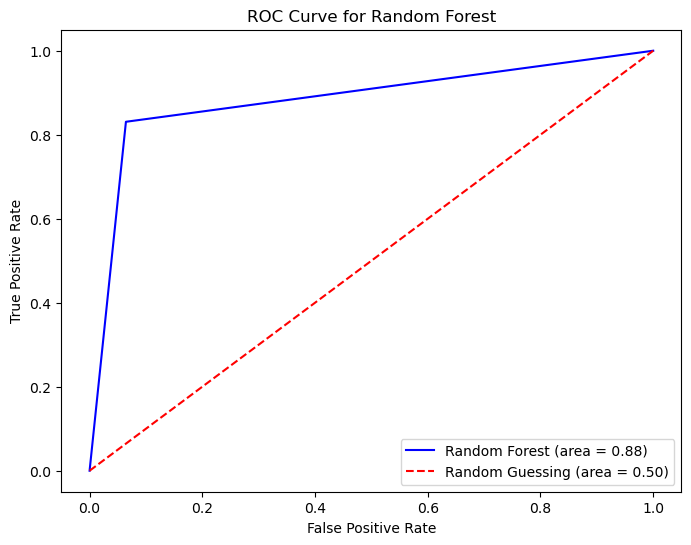

In [541]:
# Re-check Random Forest model after dropping irrelevant features
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
# Fit the model on the balanced training data
rf.fit(X_train_selected, y_train_balanced)
# Make predictions on the test set
y_pred_rf = rf.predict(X_test_selected)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_rf))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_rf)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()



              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5753
           1       0.83      0.80      0.82      1460

    accuracy                           0.93      7213
   macro avg       0.89      0.88      0.88      7213
weighted avg       0.93      0.93      0.93      7213

[[5518  235]
 [ 293 1167]]
Accuracy: 0.9267988354360183
ROC AUC Score: 0.879233407703902


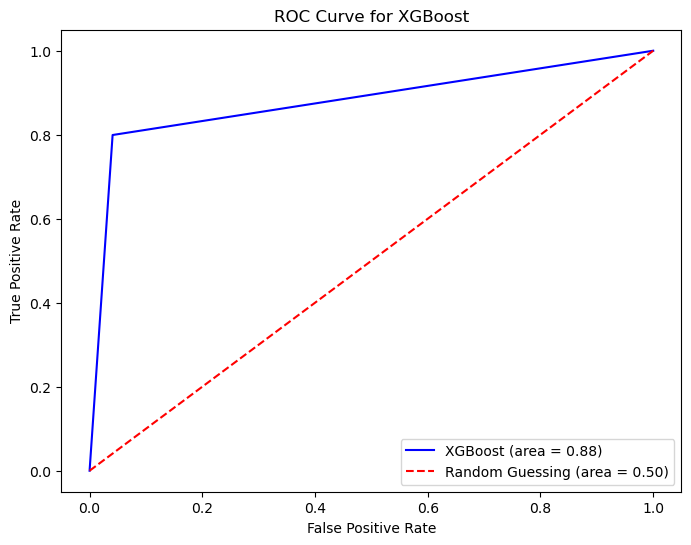

In [542]:
# Re-check XGBoost model after dropping irrelevant features
# Create an XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# Fit the model on the balanced training data
xgb.fit(X_train_selected, y_train_balanced)
# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test_selected)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Print classification report
print(classification_report(y_test, y_pred_xgb))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_xgb))
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_xgb)), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.50)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()



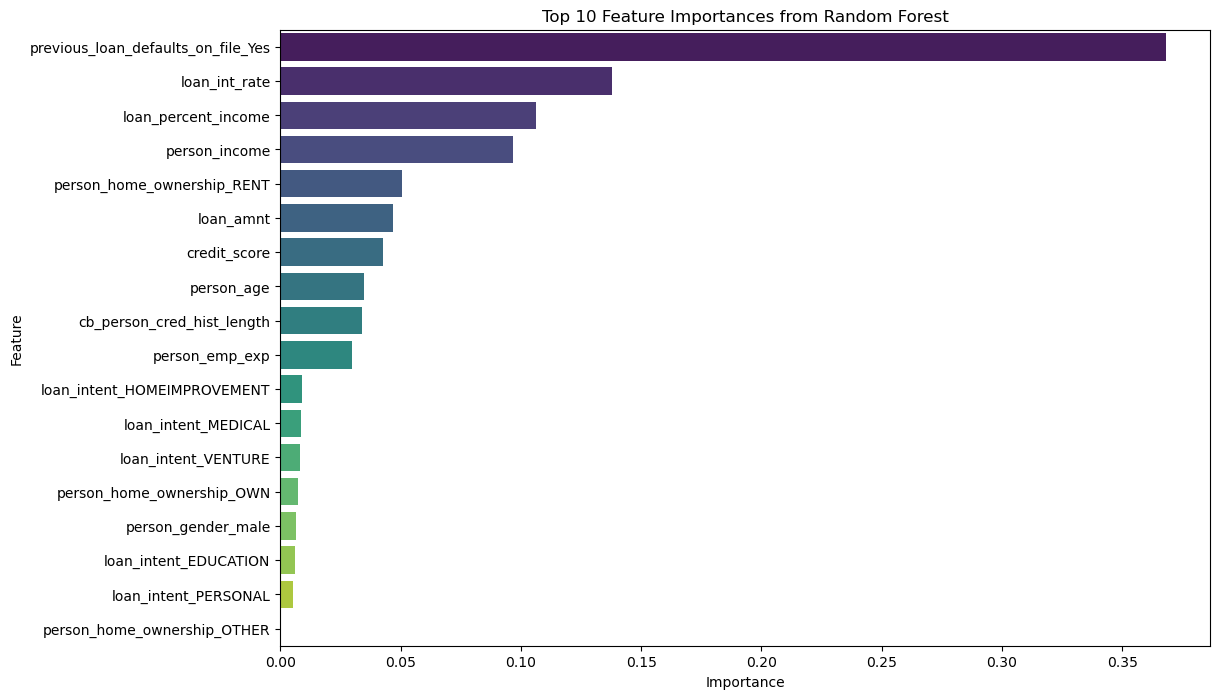

In [543]:
# Recheck the feature importances from the Random forest model after dropping irrelevant features
importances = rf.feature_importances_
# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': importances})
# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

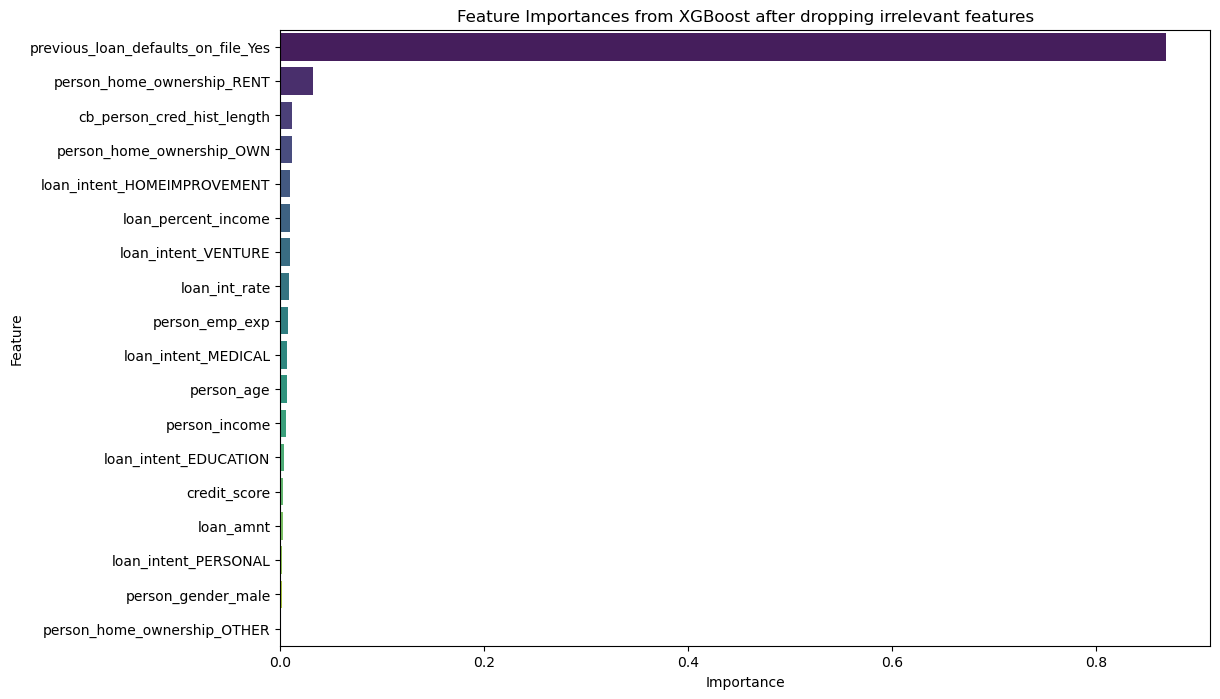

In [544]:
# Recheck the feature importances from the XGBoost model after dropping irrelevant features
importances_xgb = xgb.feature_importances_
# Create a DataFrame for better visualization
importances_xgb_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': importances_xgb})
# Sort the DataFrame by importance
importances_xgb_df = importances_xgb_df.sort_values(by='Importance', ascending=False)
# Plot feature importances from XGBoost
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_xgb_df, palette='viridis')
plt.title('Feature Importances from XGBoost after dropping irrelevant features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [545]:
# trained data head of XGBoost model
X_train_selected.head(10)

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -1.143003      -1.278958       -1.052408  -0.728877      -1.158992   
1    1.448053      -1.213620        1.268945  -1.106036      -0.403781   
2    1.448053      -0.796391        0.753089   0.151161      -1.353775   
3   -0.624792       0.183616       -1.052408   0.255927      -1.483630   
4    0.929842      -0.333654        1.268945   0.360694       1.561135   
5    0.670736      -1.045381        0.753089  -1.106036       0.043878   
6   -0.624792      -0.648268       -1.052408  -1.147943      -1.329854   
7    0.670736       0.469755        0.495161   0.989292      -1.357192   
8    1.448053      -0.174726        2.558585  -0.309811       0.669234   
9    0.411631      -0.283570        0.237233  -0.686970      -0.099646   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             0.420116                   -1.132819     -0.718494   
1            -0.556994                    1.511434     -0.697499   
2             0.978465                    1.133683      0.793192   
3             0.001355                   -1.132819      0.793192   
4             0.559703                    1.133683     -0.466547   
5            -0.696581                    0.378182     -0.403560   
6            -0.975755                   -0.377318     -0.613516   
7             0.280529                    1.133683      0.898170   
8            -0.277820                    0.755933      0.016353   
9            -0.696581                    1.511434      0.814187   

   person_gender_male  person_home_ownership_OTHER  person_home_ownership_OWN  \
0                True                        False                      False   
1                True                        False                      False   
2                True                        False                      False   
3               False                        False                      False   
4               False                        False                      False   
5               False                        False                      False   
6               False                        False                      False   
7               False                        False                       True   
8                True                        False                      False   
9                True                        False                      False   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                        True                   True   
1                        True                  False   
2                        True                  False   
3                       False                   True   
4                        True                  False   
5                        True                  False   
6                        True                  False   
7                       False                  False   
8                       False                   True   
9                        True                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                        False                False                 False   
1                        False                 True                 False   
2                        False                 True                 False   
3                        False                False                 False   
4                        False                 True                 False   
5                        False                False                 False   
6                        False                False                 False   
7                        False                False                 False   
8                        False                False                 False   
9                        False                 True                 False   

   loan_intent_VENTURE  previous_loan_defaults_on_file_Yes  
0                Fals

#  Save the Model

In [546]:
# # Save the Random Forest model
# import joblib

# # Train (Fit) the Model
# rf = RandomForestClassifier(random_state=42, n_estimators=100)
# rf = rf.fit(X_train_selected, y_train_balanced)

# # Save the model to a file
# joblib.dump(rf, 'loan_default_model_v2.pkl')
# # Load the model from the file
# loaded_model = joblib.load('loan_default_model_v2.pkl')

In [547]:
# # Save the best model
# import joblib

# # Train (Fit) the Model
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# xgb = xgb.fit(X_train_selected, y_train_balanced)

# # Save the model to a file
# joblib.dump(xgb, 'loan_default_model_v2.pkl')
# # Load the model from the file
# loaded_model = joblib.load('loan_default_model_v2.pkl')
